# Анализ рынка видеоигр для интернет-магазина

**Цели работы**:
1. Оценить длительность популярности игровых платформ.
2. Найти самые популярные игоровые платформы.
3. Найти платформы с растущим трендом популярности. 
4. Оценить влияние на продажи игр их рейтинга от критиков и пользователей на разных платформах.
5. Найти наиболее популярные жанры игр.
6. Составить портрет пользователя каждого региона (по популятрости платформы, по жанру, по возрасному рейтингу).

**Проверить гипотезы**:
 * Одинаковые ли средние пользовательские рейтинги платформ Xbox One и PC;
 * Отличаются ли средние пользовательские рейтинги жанров Action и Sports
 
 Исторические данные о продажах игр `/datasets/games.csv`

Таким образом, исследование пройдёт в четыре этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Анализ факторов влияющих на продажи.
 4. Проверка гипотез.

## Обзор данных.

In [1]:
import pandas as pd  # импорт библиотеки pandas

pd.options.display.float_format = '{:.2f}'.format  # установка вывода всех дробных чисел с точность до 2-х знаков после зяпятой 

Загрузка датасета с продажами игр

In [2]:
df=pd.read_csv('/datasets/games.csv')

Просмотр датасета

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.00,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,2006.00,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.00,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Просмотр общей информации

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Согласно документации описание столбцов:
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Замечания к данным:
* Все названия столбцов начинаются с заглавной буквы.
* Столбец `User_Score` имеет тип `object`
* Столбец `Year_of_Release` имеет тип `float64`
* Встречаются пропуски

## Предобработка данных

**Замена стиля заголовков**

In [5]:
df=df.rename(columns=lambda col: col.lower()) # все заголовки в нижнеем регистре
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо! Приводим названия колонок к общепринятому стилю. 😉 <br>
А можно просто методом вот так:</font><br>
`df.columns = df.columns.str.lower()`

 **Пропуски значений**

In [6]:
# обзор пропусков в процентах
(df.isna().mean()*100).to_frame().rename(columns = {0:'space'}) 

,space
name,0.01
platform,0.00
year_of_release,1.61
genre,0.01
na_sales,0.00
eu_sales,0.00
jp_sales,0.00
other_sales,0.00
critic_score,51.32
user_score,40.09


**Доля пропусков**

Text(0.5, 1.0, 'Доля пропусков в датасете, % \n')

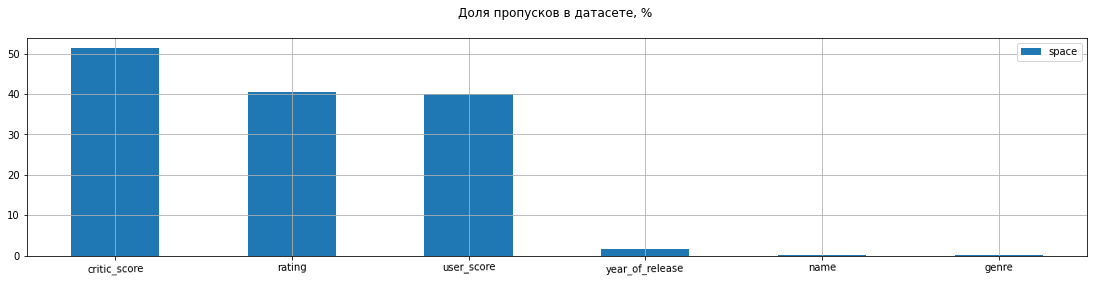

In [7]:
(
    (df.isna().mean()*100)
    .to_frame()
    .rename(columns = {0:'space'})
    .query('space > 0')
    .sort_values(by = 'space', ascending = False)
    .plot(kind= 'bar', figsize=(19,4),grid = True, rot = 1)
    .set_title('Доля пропусков в датасете, % ' + '\n')
)

Пропусками в кактегории `name` и `genre` можно пренебречь, из-за их незначительного количества

In [8]:
df.query('name.isna() & genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
# удаление не строк с пропусками в категории name, genre
df = df.dropna(subset =['name','genre']).reset_index(drop=True)

**Обработка пропусков в `year_of_release`**

In [10]:
df.query('year_of_release.isna()').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Просмотр уникальных знаений

In [11]:
df.query('year_of_release.isna()')['name'].unique()

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006',
       'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Triple Play 99', 'Adventure', 'Combat',
       'LEGO Harry Potter: Years 5-7', 'NASCAR Thunder 2003',
       'Hitman 2: Silent Assassin', 'Legacy of Kain: Soul Reaver',
       'Donkey Kong Land III', 'Air-Sea Battle', 'Suikoden III',
       'Wheel of Fortune', 'Yakuza 4', 'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'Shaun White Snowboarding',
       'PES 2009: Pro Evolution Soccer', 'WarioWare: Twisted!',
       'Madden NFL 11', 'Test Drive Unlimited 2',
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
       'Monster Hunter 2', 'Metal Gear Solid 2: Substance',
       'Advanc

В  названиях игры спортивных симуляторах присутствуют годы спортивного сезона  

Сравнение продаж в категории  year_of_release с пропусками и без 

In [12]:
df.query('year_of_release.isna()')[['na_sales','eu_sales','jp_sales','other_sales']].describe()

,na_sales,eu_sales,jp_sales,other_sales
count,269.00,269.00,269.00,269.00
mean,0.22,0.09,0.02,0.03
std,0.42,0.21,0.09,0.08
min,0.00,0.00,0.00,0.00
25%,0.01,0.00,0.00,0.00
50%,0.09,0.02,0.00,0.01
75%,0.24,0.10,0.00,0.03
max,4.26,2.36,0.77,0.71


In [13]:
df[['na_sales','eu_sales','jp_sales','other_sales']].describe()

,na_sales,eu_sales,jp_sales,other_sales
count,16713.00,16713.00,16713.00,16713.00
mean,0.26,0.15,0.08,0.05
std,0.81,0.50,0.31,0.19
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,0.08,0.02,0.00,0.01
75%,0.24,0.11,0.04,0.03
max,41.36,28.96,10.22,10.57


Разница в продажах несущественная с учетом доли пропусков в 1.6 %

Вероятно причина пропусков в:
* некачаственно собранных данных;
* выхода одной и той же игры на разных платформах 

Пропуски можно заменить:
* годом выхода игры на другой платформе
* годом указанным  в названии игры спортивных симуляторов минус 1 
* средним годом релиза игры для конкретной платформы

Но так как доля  пропусков в категории `year_of_release` низкая (1,6 %) и среднии значения продаж не сильно отличаются, можно без существенного влияние на датасет удалить пропуски

In [14]:
 df = df.dropna(subset =['year_of_release']).reset_index(drop=True)

**Обработка пропусков в `critic_score` ,`user_score`,`rating`**

Вероятно, причина большинства пропусков в этих категориях в годе релиза игры и регионе продаж, так как:
 * игровое сообщество  не сразу с момента с создания гейм индустрии стало присваивать рейтинги
 * организация ESRB была создана только  1994 году в Северной Америке
 * некоторые игры рассчитаны на небольшие рынки (Япония)

Сравним доли пропусков в зависимости от года релиза

In [15]:
df[['critic_score', 'user_score','rating','year_of_release' ]].query('year_of_release > 2000 ').isna().mean()

critic_score      0.45
user_score        0.32
rating            0.33
year_of_release   0.00
dtype: float64

In [16]:
df[['critic_score', 'user_score','rating','year_of_release' ]].query('year_of_release < 2000 ').isna().mean()

critic_score      0.95
user_score        0.95
rating            0.95
year_of_release   0.00
dtype: float64

**Вывод: доля пропусков связана с годом релиза**

Посмотрим на зависимость количества продаж с пропусками в рейтингах для разных рынков.
Так как уже установлена одна из причин пропусков - год релиза. Возьмем игры по новее. 

In [17]:
df.query('critic_score.isna() | user_score.isna() | rating.isna() & year_of_release > 2000').mean().to_frame()

,0
year_of_release,2005.87
na_sales,0.18
eu_sales,0.09
jp_sales,0.10
other_sales,0.02
critic_score,68.06


In [18]:
df.query('~critic_score.isna() | ~user_score.isna() | ~rating.isna() & year_of_release > 2000').mean().to_frame()

,0
year_of_release,2007.63
na_sales,0.32
eu_sales,0.18
jp_sales,0.05
other_sales,0.06
critic_score,68.99


<AxesSubplot:>

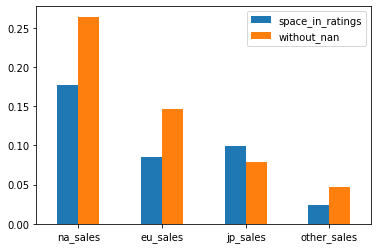

In [19]:
pd.DataFrame({'space_in_ratings' : df.query('critic_score.isna() | user_score.isna() | rating.isna() & year_of_release > 2000')\
                .mean(),"without_nan" :df.mean()})\
                .drop(['critic_score','year_of_release']).plot(kind ='bar',rot = 0)

Видно, что Япония единственный регион, где безрейтинговые продажи игр в выше рейтинговых.

Пропуски содержат много ценной информации о рынке Японии и старых игр.

**Сохраним пропуски в датасете**

Поставим пометку в возрастных рейтингах, для иследования зависимости продаж по регионам

In [20]:
df['rating'] = df['rating'].fillna('unknow')

**Поиск дубликатов**

In [21]:
#явные дубликаты 
df.duplicated().sum()

0

**Преобразование  столбцов**

In [22]:
# преобразование в целочисленный тип года релиза
df['year_of_release'] = df['year_of_release'].astype('int')

In [23]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Кроме пропусков еще значение tbd  (to be determined), что означает - предстоит определить. Его можно не учитывать в дальнейшем.
Так как замена любым значением может исказить данные.

In [24]:
# замена обектного типа на вещественное число
# умножим на 10 чтобы сделать шкалу измерения рейтинга такую же как у критиков
df['user_score'] = df.query('user_score !="tbd"')['user_score'].astype('float')*10

Добавление столбца общих продаж

In [25]:
df.insert(8,
          'total_sales',
          df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
         )

Просмотр датасета с новым столбцом

In [26]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.00,80.00,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,unknow
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.00,83.00,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.00,80.00,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,unknow


In [27]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   total_sales      16444 non-null  float64
 9   critic_score     7983 non-null   float64
 10  user_score       7463 non-null   float64
 11  rating           16444 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## Анализ факторов влияющих на продажи

**Анализ уровня продаж в зависимости от года релиза**

<AxesSubplot:title={'center':'Количество проданных игр за все время'}, xlabel='year_of_release', ylabel='Продажи в млн.'>

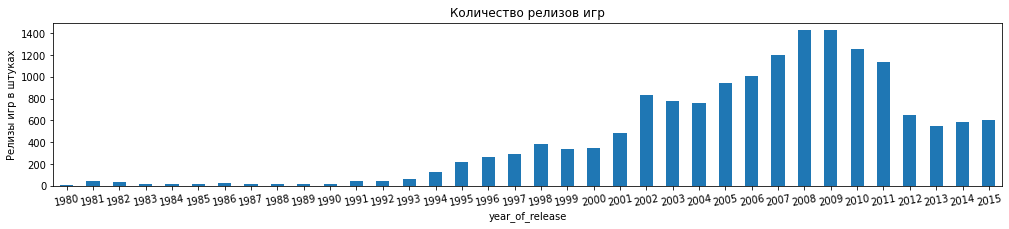

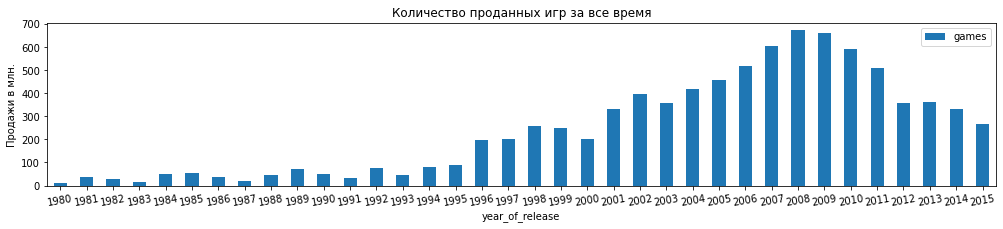

In [28]:
# группировка по году релиза, кроме неполного 2016
df.query('year_of_release < 2016')\
    .groupby('year_of_release')['name']\
    .count()\
    .plot(kind='bar',figsize =(17,3),title = 'Количество релизов игр', rot = 10, ylabel = 'Релизы игр в штуках')

df.query('year_of_release < 2016').pivot_table(index =['year_of_release'], values='total_sales',aggfunc ='sum') \
    .rename(columns = {'total_sales' : 'games'})\
    .plot(kind='bar',figsize = (17,3), rot = 10,  title = 'Количество проданных игр за все время',ylabel = 'Продажи в млн.')

    До финансового кризиса 2008 года росло  количество релизов и продажи игр. 
    Возможно, из-за других каналов покупки игр, мобильных игр и повышения среднего возраста населения


**Анализ популярности игровых платформ**

Популярность игровых платформ за все время

<AxesSubplot:title={'center':'Количество проданных игр за все время, млн.'}, xlabel='platform'>

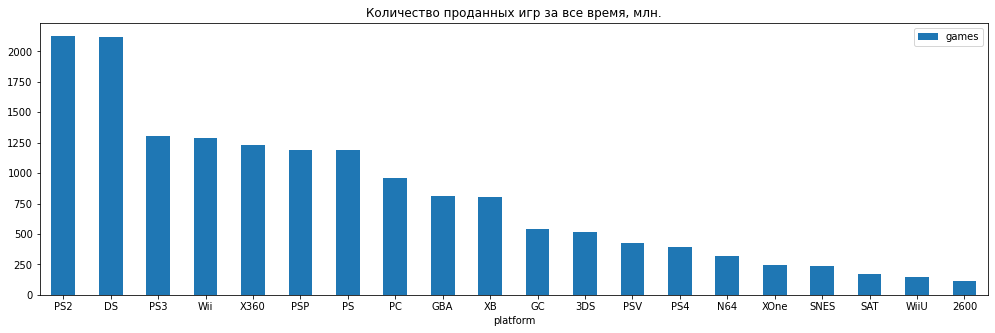

In [29]:
df.pivot_table(index =['platform'], values='total_sales',aggfunc ='count')\
    .sort_values('total_sales',ascending=False)[:20]\
    .rename(columns = {'total_sales' : 'games'})\
    .plot(kind='bar',figsize = (17,5), rot = 0, title = 'Количество проданных игр за все время, млн.')

Докризисные платформы демонстрируют лучшие продажи 

In [30]:
# Список 20 самых популярных платформ
list_platforms = df.pivot_table(index =['platform'], values='year_of_release',aggfunc ='count') \
    .sort_values('year_of_release',ascending=False)[:20]\
    .index


In [31]:
list_platforms

Index(['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'GBA', 'XB', 'GC',
       '3DS', 'PSV', 'PS4', 'N64', 'XOne', 'SNES', 'SAT', 'WiiU', '2600'],
      dtype='object', name='platform')

Продажи игр в разрезе платформ

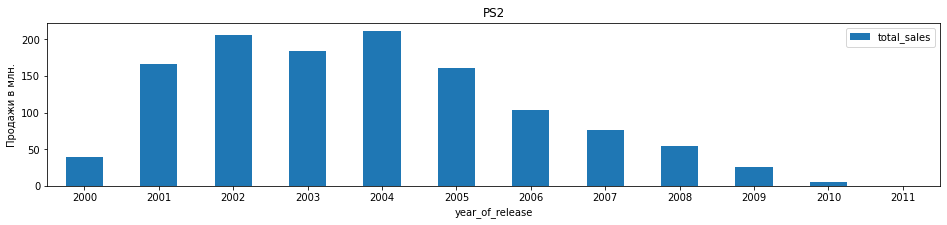

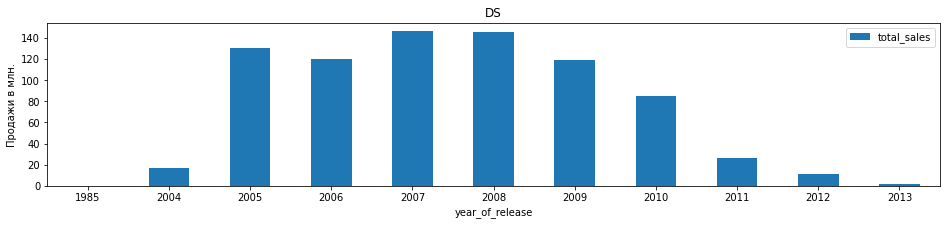

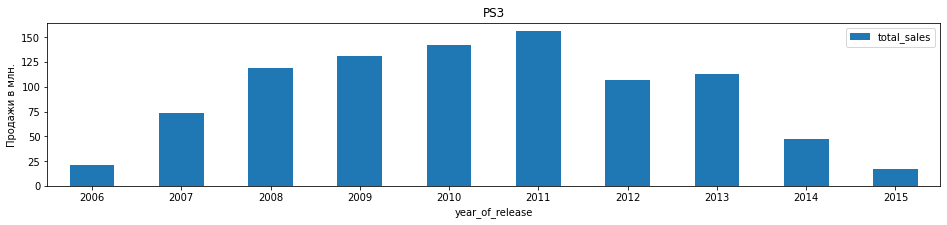

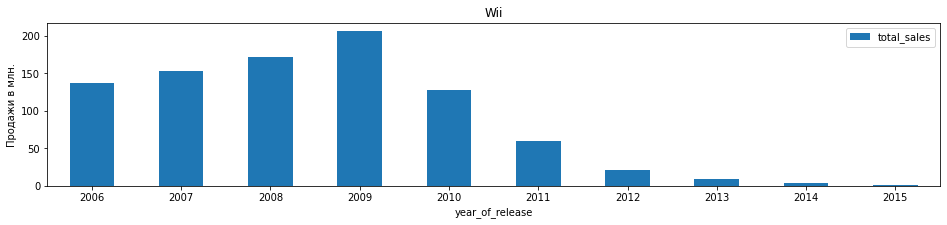

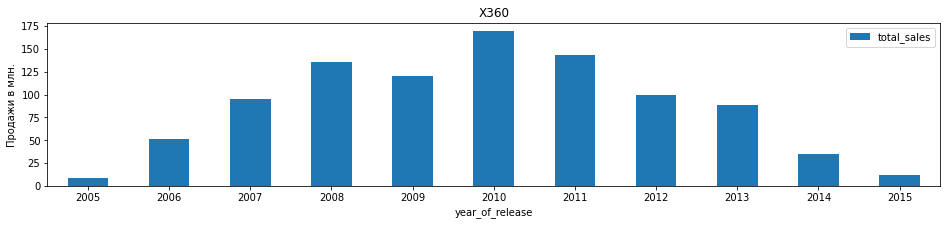

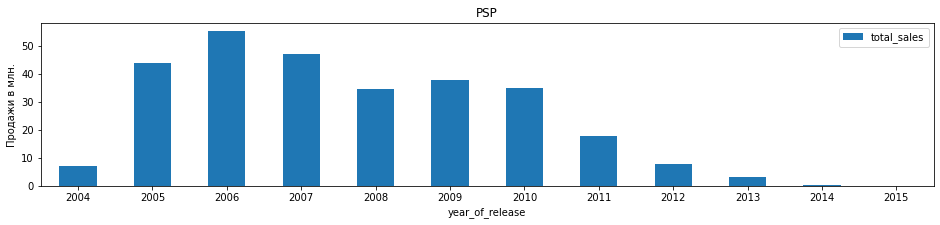

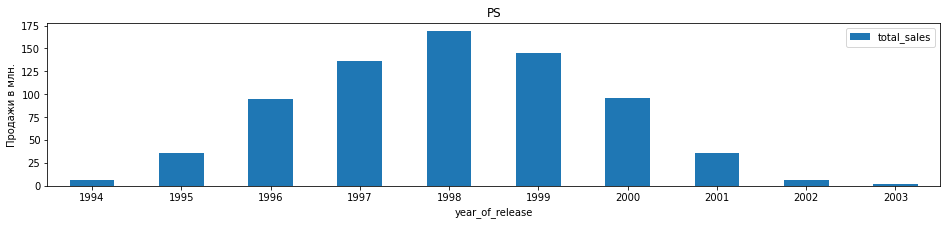

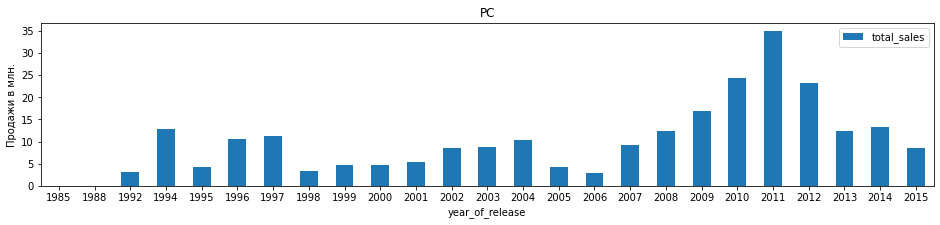

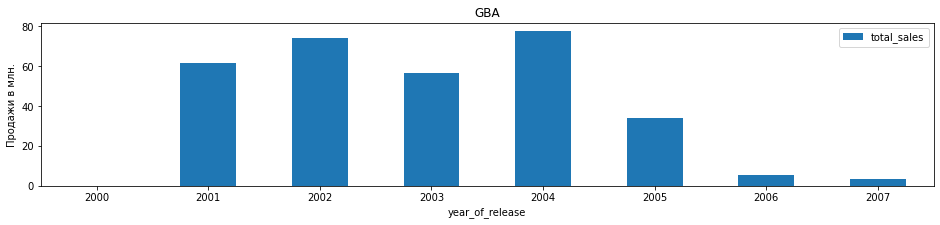

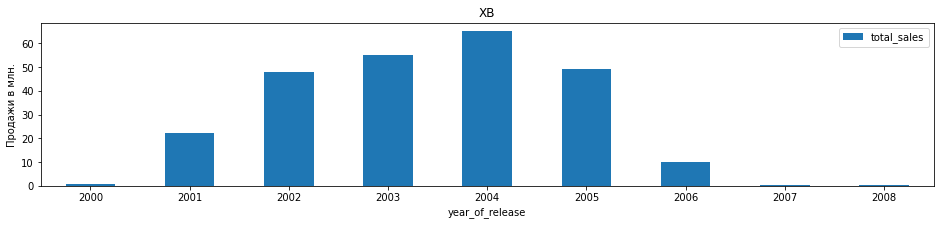

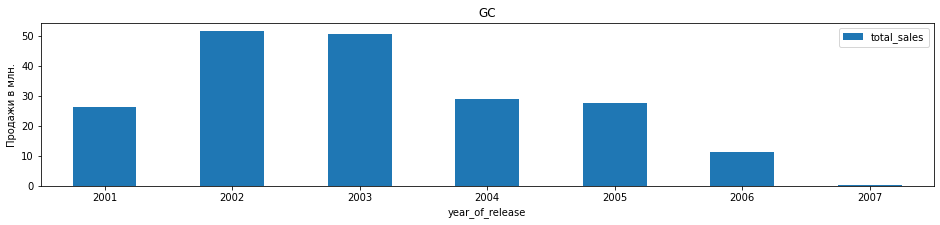

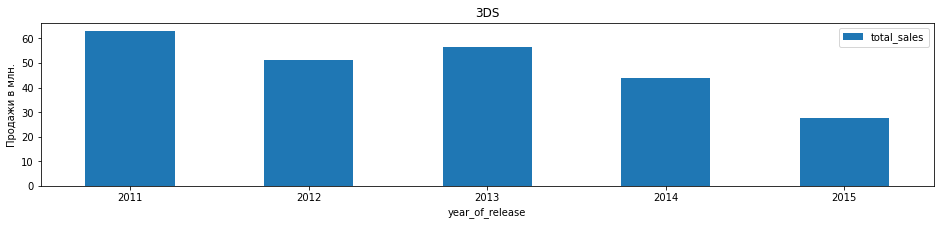

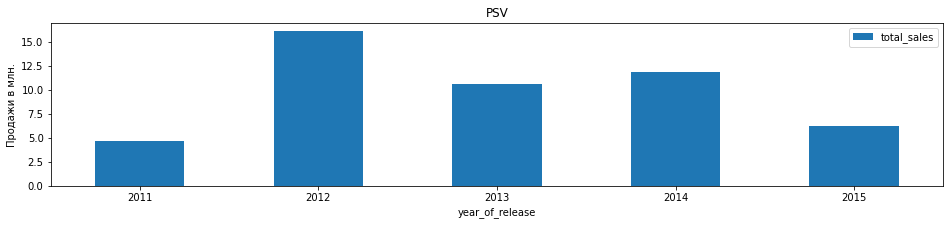

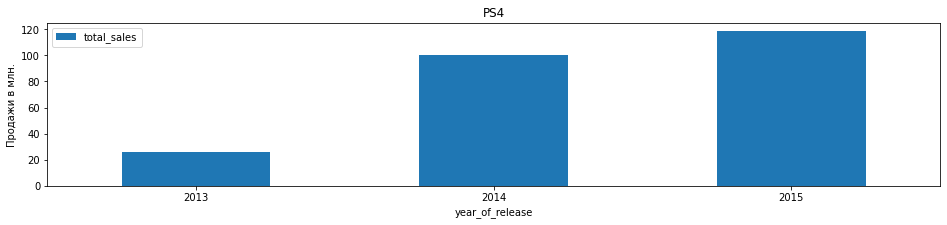

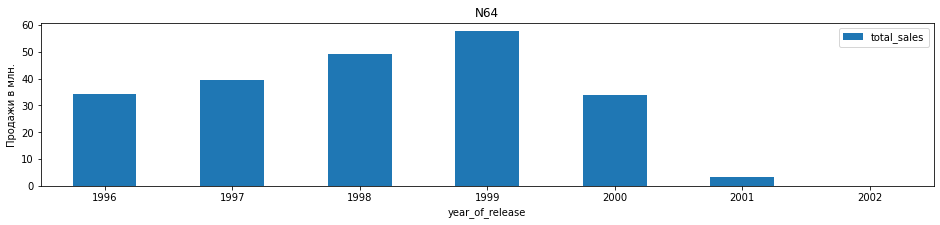

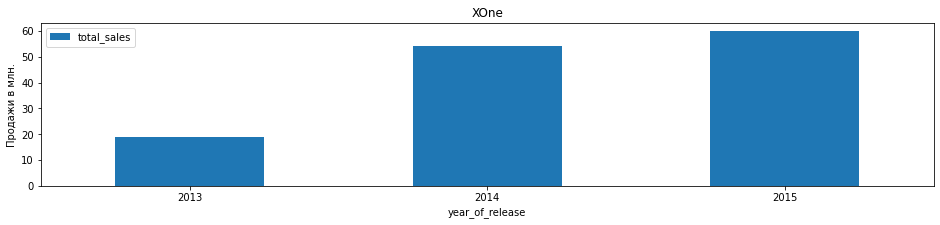

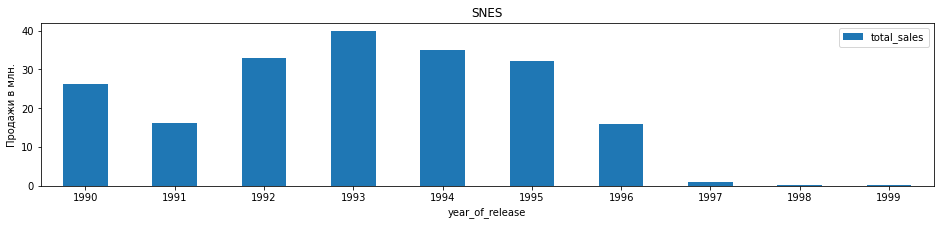

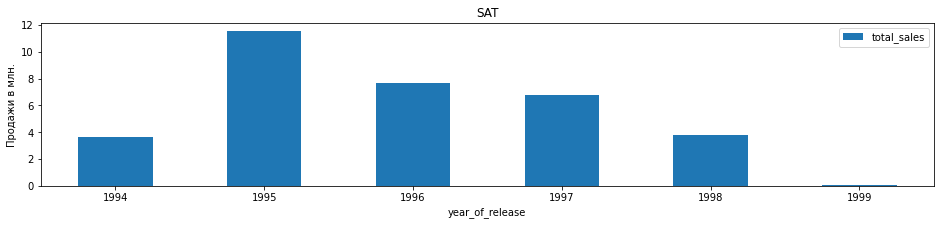

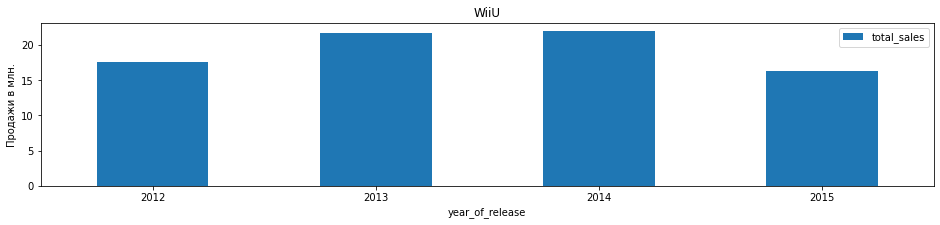

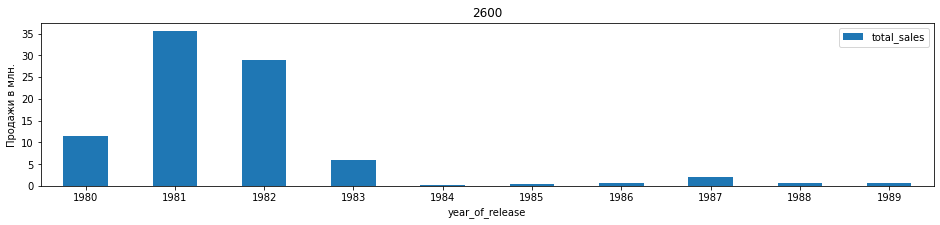

In [32]:
# из-за неполноты данных, сводная таблица не вклюючает 2016 год 
for platform in list_platforms:
    df.query('year_of_release < 2016').pivot_table(index =['platform','year_of_release'],values='total_sales',aggfunc ='sum') \
    .reset_index(level=[1,0]).query('platform == @platform') \
    .plot(x='year_of_release',y='total_sales',kind ='bar',title = platform, figsize = (16,3), rot = 0, ylabel ='Продажи в млн.')


In [33]:
# удаление явной ошибки в данных для DS
df = df.query('~(platform  == "DS" & year_of_release == 1985)')

    От 1 до 6 лет - срок при котором достигается пик продаж игр для платформы.
    Отдельно выделяются игры на ПК, так как сами по себе ПК обновляются.
    Растущий тренд (на 2015) имеют всего 2 платформы - XOne, PS4 

Круговая диаграмма с долями продаж за последний полный год

<AxesSubplot:title={'center':'Доли платформ в продажах игр  с 2015'}, ylabel='total_sales'>

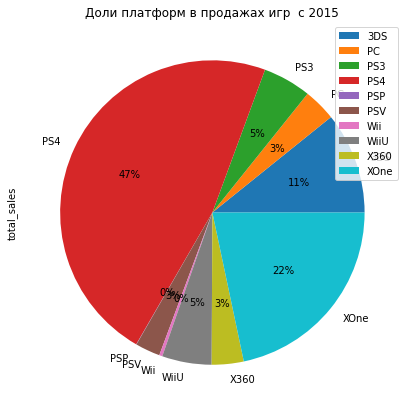

In [34]:
df.query('year_of_release>=2015').pivot_table(index = 'platform', values='total_sales',aggfunc ='sum')\
    .plot.pie(y = 'total_sales',autopct='%1.0f%%',figsize = (7,7),title= 'Доли платформ в продажах игр  с 2015')

80 % рынка по продажам за 2015 и не полный 2016 делят 3 платформы - PS4, XOne и 3DS  

**Анализ попурярности жанров**

Так как нас интересуют продажи на 2017, то возьмем  данные с 2013 года. Когда вышли игры на PS4, XOne

In [35]:
df_actual = df.query('year_of_release >= 2013')

Построения ящика с усами для платфом с 2013-2016

Text(0.5, 1.0, 'Все выбросы')

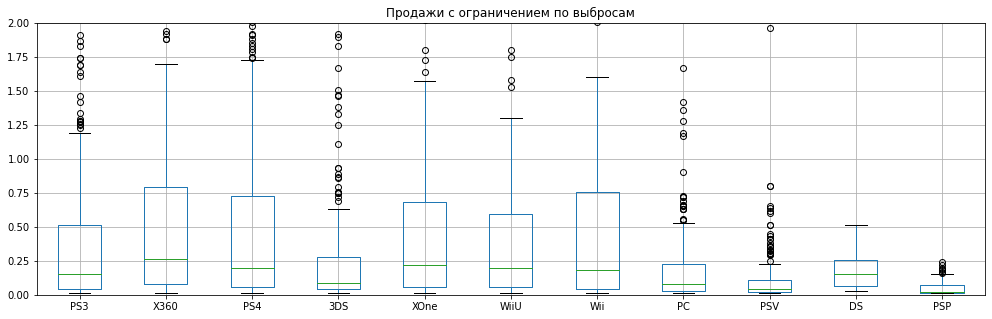

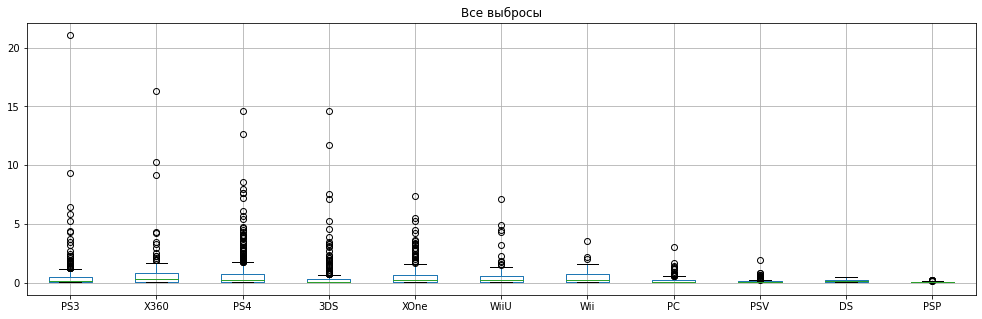

In [36]:
import matplotlib.pyplot as plt
df_platform = pd.DataFrame(index = df.index)

for platform in df_actual['platform'].unique(): 
    df_platform[platform] = df_actual\
    .query('platform == @platform')['total_sales']

plt.figure(figsize=(17, 5))
df_platform.boxplot()
plt.title('Продажи с ограничением по выбросам')
plt.ylim(0, 2)

plt.figure(figsize=(17, 5))
df_platform.boxplot()
plt.title('Все выбросы')

In [37]:
df_platform.describe()

,PS3,X360,PS4,3DS,XOne,WiiU,Wii,PC,PSV,DS,PSP
count,345.00,186.00,392.00,303.00,247.00,115.00,23.00,189.00,358.00,8.00,67.00
mean,0.53,0.74,0.80,0.47,0.65,0.56,0.59,0.21,0.09,0.19,0.05
std,1.45,1.66,1.61,1.38,1.04,1.04,0.92,0.35,0.15,0.17,0.06
min,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.03,0.01
25%,0.04,0.08,0.06,0.04,0.06,0.06,0.04,0.03,0.02,0.07,0.01
50%,0.15,0.27,0.20,0.09,0.22,0.20,0.18,0.08,0.04,0.15,0.02
75%,0.51,0.80,0.73,0.28,0.69,0.60,0.76,0.23,0.11,0.25,0.07
max,21.05,16.27,14.63,14.60,7.39,7.09,3.58,3.05,1.96,0.51,0.24


Выбросами являются очень популярные игры, без некоторых игр показатели продаж определенных жанров сильно упадут

**Связь между объемами продаж и оценками пользователей и критиков**

In [38]:
# корреляция во всем датасете
df[['total_sales','critic_score','user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.00,0.25,0.09
critic_score,0.25,1.00,0.58
user_score,0.09,0.58,1.00


In [39]:
# корреляция в актуальном  датасете
df_actual[['total_sales','critic_score','user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.00,0.31,-0.00
critic_score,0.31,1.00,0.50
user_score,-0.00,0.50,1.00


Наблюдается полное  отсутствие корреляции между пользовательскими оценками и количеством продаж

Но оценки критиков положительно коррелируют в продажами

Ожидаемо присутствует связь оценок критиков и пользователей

Возможно отсутствие связи пользовательских оценок с продажами связана  с тем, что  оценки ставят в основном  те кому игра сильно понравилась или не понравилась, или фанаты определенного  жанра 

In [40]:
# просмотр СКО
df_actual[['critic_score','user_score']].std()

critic_score   12.84
user_score     16.10
dtype: float64

Видно, что разброс пользовательских оценок сильнее чем у критиков 

Связь между объемами продаж и оценками пользователей и критиков за 2013-2016 годы

In [41]:
df_actual_pivot_platform = df_actual.pivot_table(index = 'platform', values = 'total_sales',aggfunc ='sum')\
    .sort_values('total_sales',ascending =False)
# топ-5 платформ в актуальном датасете
list_platform_top_5 = df_actual_pivot_platform[:5].index 

In [42]:
for platform in list_platform_top_5:
    display(df_actual.query('platform == @platform')[['total_sales','critic_score','user_score']].corr()
            .rename(columns = {'total_sales' : 'total_sales_' + platform,
                               'critic_score': 'critic_score_' + platform,'user_score': 'user_score_' + platform})
            .rename(index = {'total_sales' : 'total_sales_' + platform,
                               'critic_score': 'critic_score_' + platform,'user_score': 'user_score_' + platform}) 
           )
           

,total_sales_PS4,critic_score_PS4,user_score_PS4
total_sales_PS4,1.00,0.41,-0.03
critic_score_PS4,0.41,1.00,0.56
user_score_PS4,-0.03,0.56,1.00


,total_sales_PS3,critic_score_PS3,user_score_PS3
total_sales_PS3,1.00,0.33,0.00
critic_score_PS3,0.33,1.00,0.60
user_score_PS3,0.00,0.60,1.00


,total_sales_XOne,critic_score_XOne,user_score_XOne
total_sales_XOne,1.00,0.42,-0.07
critic_score_XOne,0.42,1.00,0.47
user_score_XOne,-0.07,0.47,1.00


,total_sales_3DS,critic_score_3DS,user_score_3DS
total_sales_3DS,1.00,0.36,0.24
critic_score_3DS,0.36,1.00,0.77
user_score_3DS,0.24,0.77,1.00


,total_sales_X360,critic_score_X360,user_score_X360
total_sales_X360,1.00,0.35,-0.01
critic_score_X360,0.35,1.00,0.52
user_score_X360,-0.01,0.52,1.00


Видим  отсутствие положительной корреляции между  объемами продаж и оценками пользователей практически на всех платформах (небольшая в 3DS).
Главные для нас  это XOne и PS4 где отсутствует корреляция с оценками пользователей

**Точечные диаграммы по топ-5 платформам**

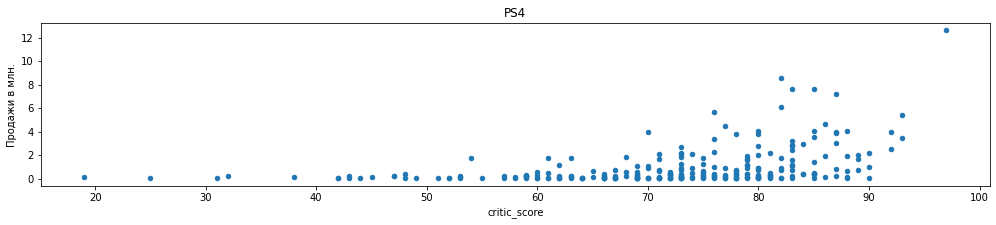

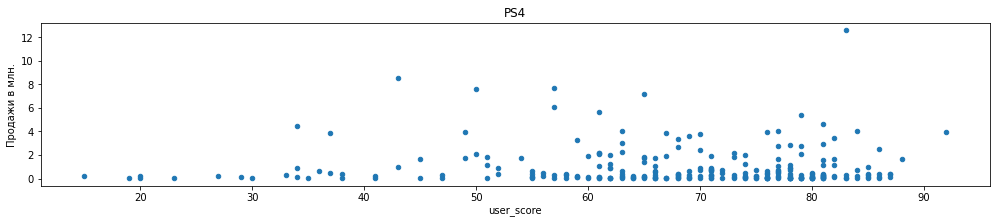

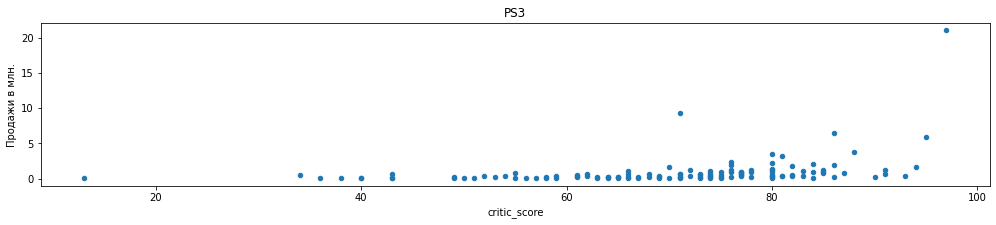

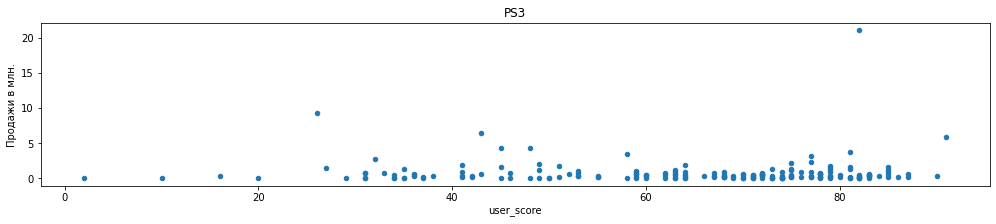

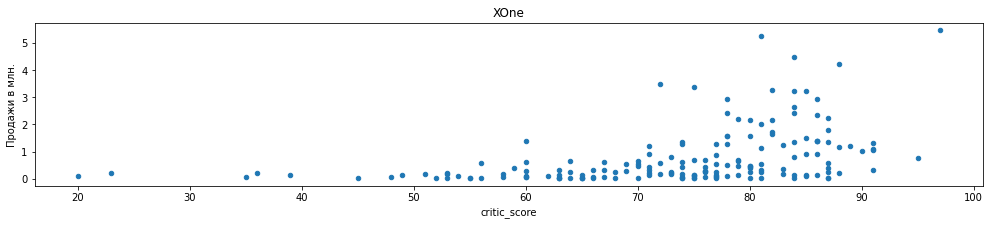

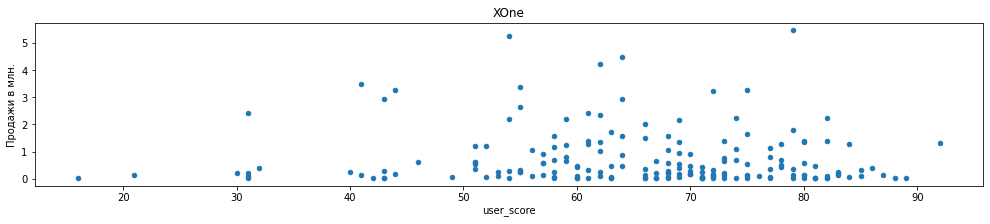

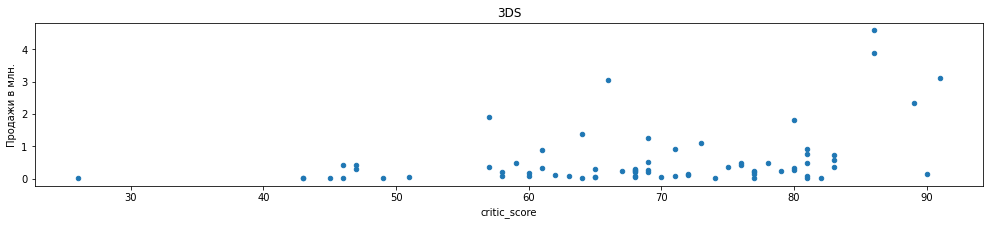

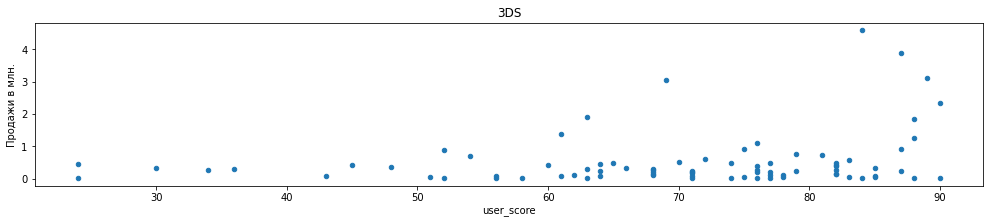

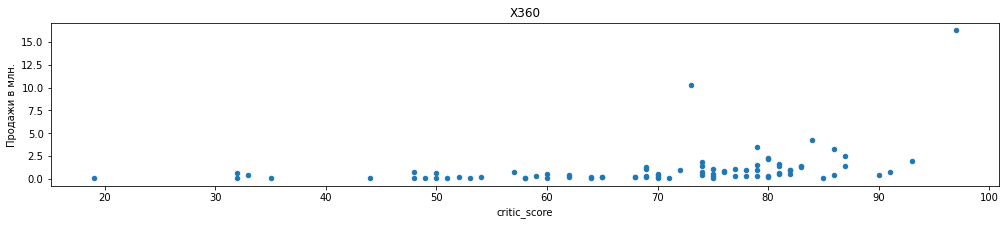

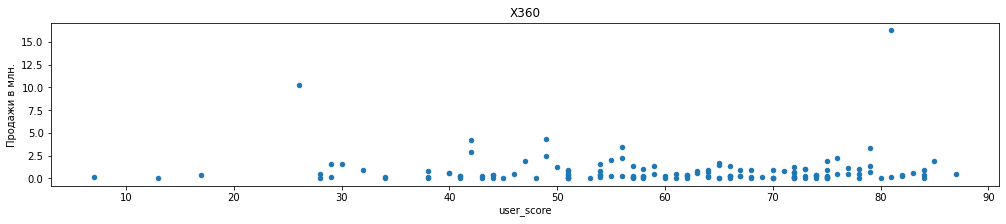

In [43]:

for platform in list_platform_top_5:
    df_actual.query('platform == @platform')\
    .plot(kind = 'scatter',y = 'total_sales', x ='critic_score',title = platform, figsize =(17,3), ylabel = "Продажи в млн.")
    df_actual.query('platform == @platform')\
    .plot(kind = 'scatter',y = 'total_sales', x ='user_score',title = platform, figsize =(17,3), ylabel = "Продажи в млн.")

Высокая оценка критиков дает некоторое основание полагать, что игра будет неплохо продаваться

**Анализ продаж по жанрам**

Зависимости  продаж игр и  их количества релизов от жанра

<AxesSubplot:title={'center':'Данные за 2013-2016'}, xlabel='genre'>

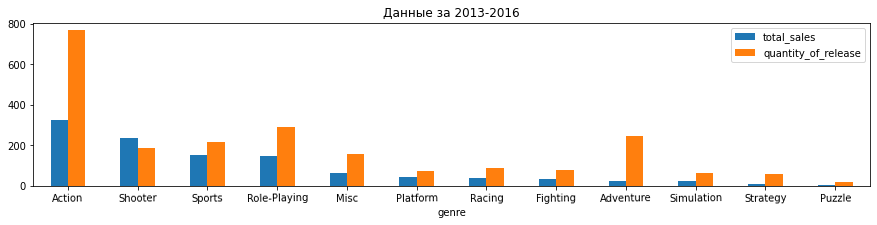

In [44]:
df_actual.pivot_table(index = 'genre', values = 'total_sales', aggfunc = ['sum','count']) \
    .sort_values(('sum', 'total_sales'), ascending = False) \
    .droplevel(1, axis=1)\
    .rename(columns ={'sum':'total_sales', 'count':'quantity_of_release'})\
    .plot(figsize=(15,3),kind ='bar', rot =1,title = 'Данные за 2013-2016')
   

Выделяется большое количество релизов игр с жанром Adventure при низких  общих продажах

<AxesSubplot:title={'center':'Данные за 2013-2016'}, xlabel='genre'>

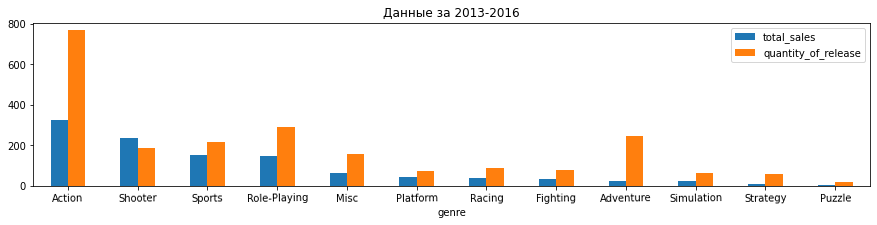

In [45]:
df_actual.pivot_table(index = 'genre', values = 'total_sales', aggfunc = ['sum','count']) \
    .sort_values(('sum', 'total_sales'), ascending = False) \
    .droplevel(1, axis=1)\
    .rename(columns ={'sum':'total_sales', 'count':'quantity_of_release'})\
    .plot(figsize=(15,3),kind ='bar', rot =1,title = 'Данные за 2013-2016')

Создание таблицы со средним значением количесва продаж на один релиз жанра

In [46]:
# сводная  таблица по жанрам с данными с 2013 года
df_actual_sales = df_actual \
    .pivot_table(index = 'genre', values = 'total_sales', aggfunc = ['sum','count']) \
    .droplevel(1, axis=1)

# добавление столбца с количеством продаж на один релиз    
df_actual_sales['sales_per_release'] = df_actual_sales['sum']/df_actual_sales['count']    
df_actual_sales.sort_values('sum',ascending = False)

,sum,count,sales_per_release
genre,,,
Action,321.87,766,0.42
Shooter,232.98,187,1.25
Sports,150.65,214,0.70
Role-Playing,145.89,292,0.50
Misc,62.82,155,0.41
Platform,42.63,74,0.58
Racing,39.89,85,0.47
Fighting,35.31,80,0.44
Adventure,23.64,245,0.10


Получение двух таблиц с сортировкой по количеству проданных экземпляров игр на жанр, и среднему количеству продаж одного релиза определенного жанра 

In [47]:
df_actual_genre_sum_sales = df_actual_sales.sort_values('sum',ascending = False)
df_actual_genre_sum_release = df_actual_sales.sort_values('sales_per_release',ascending = False)

Объеденим в одну группу жанров  - "Others" все жанры с 6 места по общим продажам на жанр

In [48]:
others_sum_sales = list(df_actual_sales.sort_values('sum',ascending = False)[5:].sum())

Объеденим в одну группу жанров  - "Others" все жанры с 6 места по общим продажам на наименование

In [49]:
others_sales_per_release = list(
    df_actual_sales.sort_values('sales_per_release', ascending = False)[5:].sum())

Таблица сортированная по сумме продаж на жанр 

In [50]:
df_actual_sum_sales = df_actual_genre_sum_sales\
    .drop(index = df_actual_sales.sort_values('sum', ascending = False)['sum'][5:]\
    .index)
    
df_actual_sum_sales.loc[ 'Others'] = others_sum_sales
df_actual_sum_sales['sales_per_release'] = df_actual_sum_sales['sum']/df_actual_sum_sales['count']  

In [51]:
df_actual_sum_sales

,sum,count,sales_per_release
genre,,,
Action,321.87,766.00,0.42
Shooter,232.98,187.00,1.25
Sports,150.65,214.00,0.70
Role-Playing,145.89,292.00,0.50
Misc,62.82,155.00,0.41
Others,176.48,619.00,0.29


Таблица сортированная по среднему количеству прождаж жанра на релиз

In [52]:
df_actual_genre_sum_release = df_actual_genre_sum_release\
    .drop(index = df_actual_sales.sort_values('sales_per_release', ascending = False)['sum'][5:]\
    .index)
    
df_actual_genre_sum_release.loc[ 'Others'] = others_sales_per_release

df_actual_genre_sum_release['sales_per_release'] = \
                df_actual_genre_sum_release['sum'] / df_actual_genre_sum_release['count']  

In [53]:
df_actual_genre_sum_release

,sum,count,sales_per_release
genre,,,
Shooter,232.98,187.00,1.25
Sports,150.65,214.00,0.70
Platform,42.63,74.00,0.58
Role-Playing,145.89,292.00,0.50
Racing,39.89,85.00,0.47
Others,478.65,1381.00,0.35


Визуализация разбивки продаж  по жанрам 

<AxesSubplot:title={'center':'Количество продаж на один релиз'}, xlabel='genre', ylabel='Продажи в млн/один релиз жанра'>

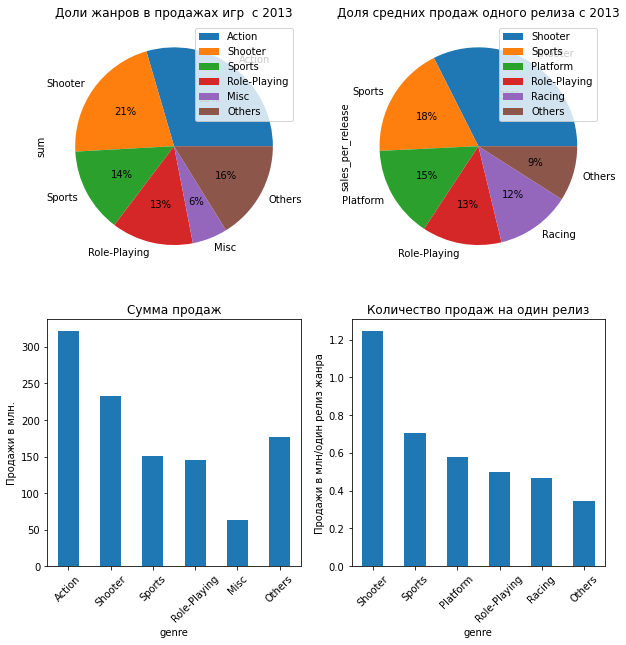

In [54]:
ax_1 = plt.subplot(2, 2, 1)
ax_2 = plt.subplot(2, 2, 2)
ax_3 = plt.subplot(2, 2, 3)
ax_4 = plt.subplot(2, 2, 4)

df_actual_sum_sales.plot.pie(y = 'sum',autopct='%1.0f%%',figsize = (20,20),
             title= 'Доли жанров в продажах игр  с 2013', ax = ax_1 )

df_actual_genre_sum_release.plot.pie(y ='sales_per_release',autopct='%1.0f%%',figsize = (20,20),
             title= 'Доля средних продаж одного релиза с 2013',ax = ax_2)

df_actual_sum_sales['sum'].plot(kind ='bar',ax = ax_3,figsize =(10,10),ylabel = 'Продажи в млн.',
                                rot = 45, title = 'Cумма продаж')

df_actual_genre_sum_release['sales_per_release'] \
    .plot(kind ='bar',ax = ax_4,figsize =(10,10),
          ylabel = 'Продажи в млн/один релиз жанра', rot = 45, title ='Количество продаж на один релиз')

Самым продаваемым жанром по общему количеству является Action.
Самым продаваемым жанром по количеству продаж на 1 релиз является Shooter


<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что мы не попали в ловушку, что максимальные продажи являются самыми прибыльными. В данных продажи по жанру для разных платформ и если одна платформа со своей одной игрой в данном жанре выстрелила, а остальные провалились, то мы все равно будем видеть максимум общих продаж, даже если остальные платформы по этому жанру были не удачны. Но для прибыльности нам нужны стабильные жанры, который приносит доход не зависимо от платформы, значит на этот жанр есть устойчивый спрос.  Было бы не плохо сравнение продаж проиллюстрировать диаграммой размаха. </font>

**Анализ продаж по региону**

<AxesSubplot:title={'center':'Доли продажи по регионам'}, ylabel='Продажи'>

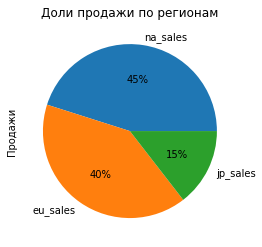

In [55]:
df_actual[['na_sales','eu_sales','jp_sales']].sum().plot.pie(autopct='%1.0f%%', ylabel ='Продажи',
                                                             title = 'Доли продажи по регионам' )

Популярность платформ для каждого региона

<AxesSubplot:xlabel='platform'>

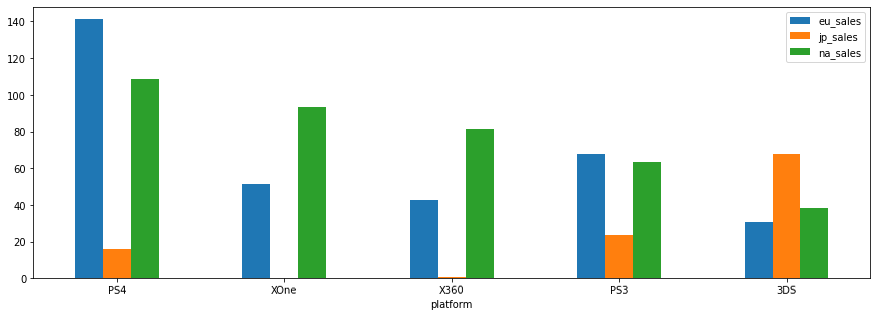

In [56]:
# продажи игр для платформ Северная Америка, Европа, Япония
# сортировка по продажам на платформах в Северной Америке
df_actual.pivot_table(index='platform',values =['na_sales','eu_sales','jp_sales'], aggfunc = 'sum' ).sort_values('na_sales',ascending = False)[:5].plot(figsize= (15,5),kind = 'bar',rot =1) 

В Японии совершенно не популярен Xbox, игры  там не будут продаваться 

Топ 5 платформ  Северной Америки, Европы, Японии

<AxesSubplot:title={'center':'Япония'}, xlabel='platform', ylabel='Продажи в млн.'>

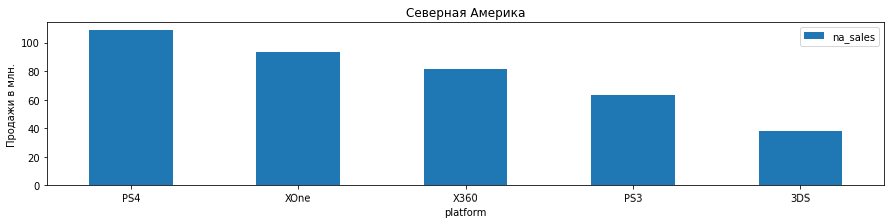

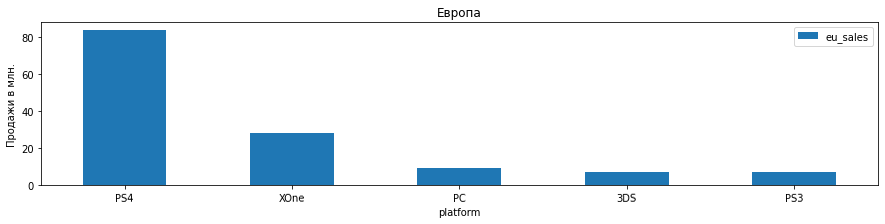

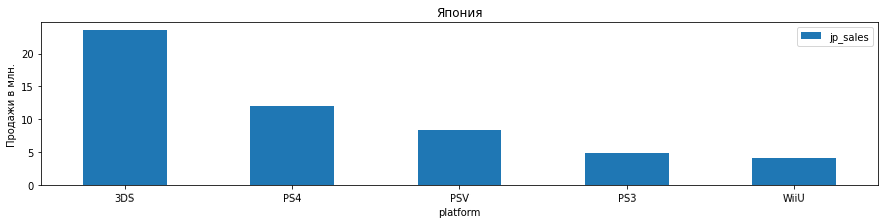

In [57]:
df_actual.pivot_table(index='platform',values =['na_sales'], aggfunc = 'sum' ) \
    .sort_values('na_sales',ascending = False)[:5] \
    .plot(kind ='bar', figsize = (15,3),rot = 1, title = 'Северная Америка', ylabel = 'Продажи в млн.' )

df_actual.query('year_of_release > 2014').pivot_table(index='platform',values =['eu_sales'], aggfunc = 'sum' ) \
    .sort_values('eu_sales',ascending = False)[:5] \
    .plot(kind ='bar', figsize = (15,3),rot = 1, title = 'Европа', ylabel = 'Продажи в млн.')

df_actual.query('year_of_release > 2014').pivot_table(index='platform',values =['jp_sales'], aggfunc = 'sum' ) \
    .sort_values('jp_sales',ascending = False)[:5] \
    .plot(kind ='bar', figsize = (15,3),rot = 1, title = 'Япония', ylabel = 'Продажи в млн.')

**Влияния жанра на продажи по регионам**

<AxesSubplot:title={'center':'Япония'}, xlabel='genre', ylabel='Продажи в млн.'>

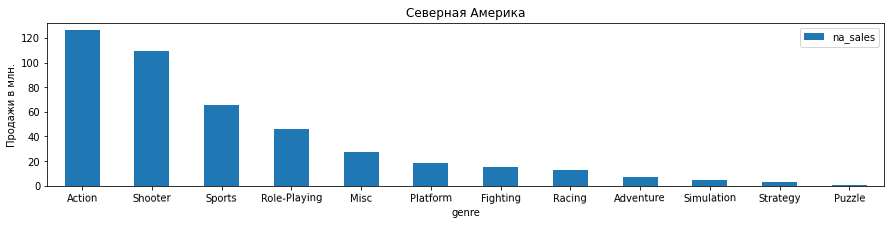

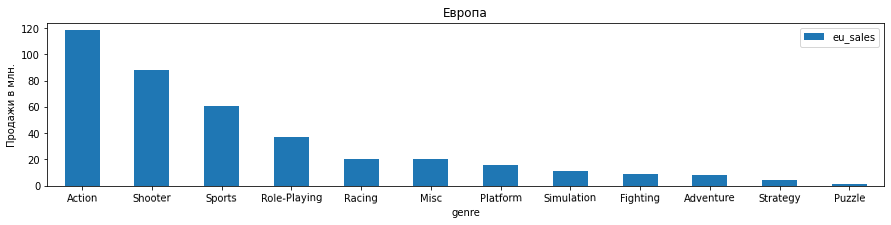

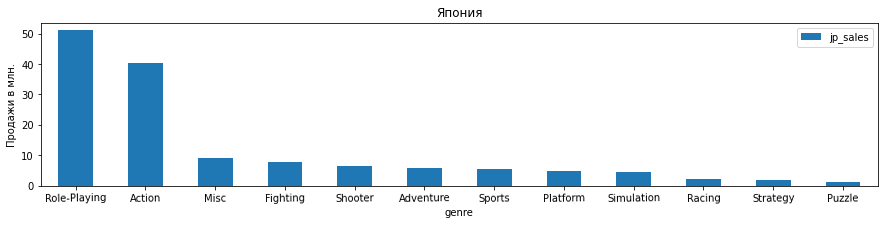

In [58]:
df_na_genre = df_actual.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum') \
    .sort_values('na_sales', ascending = False) 
    
df_na_genre.plot(figsize=(15,3),kind ='bar', rot =1,title = 'Северная Америка', ylabel = 'Продажи в млн.')

df_eu_genre = df_actual.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum') \
    .sort_values('eu_sales', ascending = False) 
    
df_eu_genre.plot(figsize=(15,3),kind ='bar', rot =1,title = 'Европа', ylabel = 'Продажи в млн.') 

df_jp_genre = df_actual.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum') \
    .sort_values('jp_sales', ascending = False) 
df_jp_genre.plot(figsize=(15,3),kind ='bar', rot =1,title = 'Япония', ylabel = 'Продажи в млн.')

In [59]:
df_na_genre.loc['Others'] = df_na_genre[6:].sum()
df_eu_genre.loc['Others'] = df_eu_genre[6:].sum()
df_jp_genre.loc['Others'] = df_jp_genre[6:].sum()

df_na_genre = df_na_genre.drop(index = list(df_na_genre[6:-1].index))
df_eu_genre = df_eu_genre.drop(index = list(df_eu_genre[6:-1].index))
df_jp_genre = df_jp_genre.drop(index = list(df_jp_genre[6:-1].index))

Топ-5 лучших жанров в каждом регионе

<AxesSubplot:title={'center':'Япония'}, ylabel='jp_sales'>

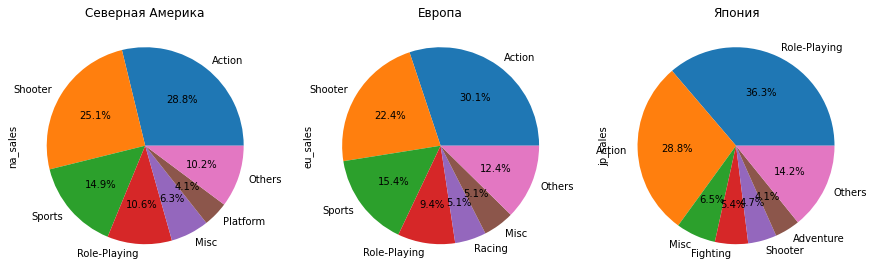

In [60]:
ax_1 = plt.subplot(2, 3, 1)
ax_2 = plt.subplot(2, 3, 2)
ax_3 = plt.subplot(2, 3, 3)

df_na_genre.plot.pie(y = 'na_sales',autopct='%1.1f%%',figsize = (15,15), legend=False,
             title= 'Северная Америка',ax= ax_1)

df_eu_genre.plot.pie(y = 'eu_sales',autopct='%1.1f%%',figsize = (15,15), legend=False,
             title= 'Европа', ax = ax_2 )

df_jp_genre.plot.pie(y = 'jp_sales',autopct='%1.1f%%',figsize = (15,15),legend=False,
             title= 'Япония', ax = ax_3 )


Предпочтения в Северной Америке и Европы  не сильно отличаются (первые 4 позиции совпадают)
В Японии же в топе положение жанров отличается (очень популярны ролевые игры, в аутсайдерах спортивные игры)

**Влияние возрастного рейтинга на продажи**

<AxesSubplot:title={'center':'Япония'}, xlabel='rating', ylabel='Продажи в млн.'>

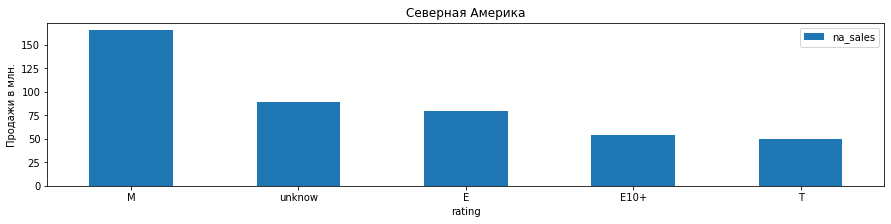

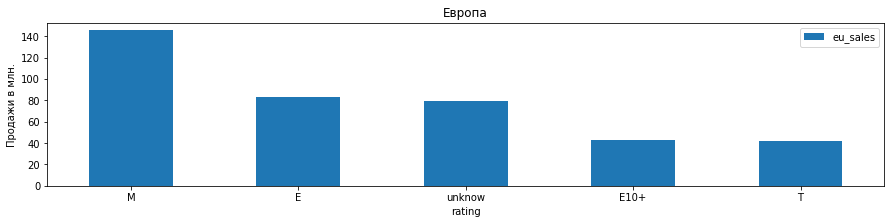

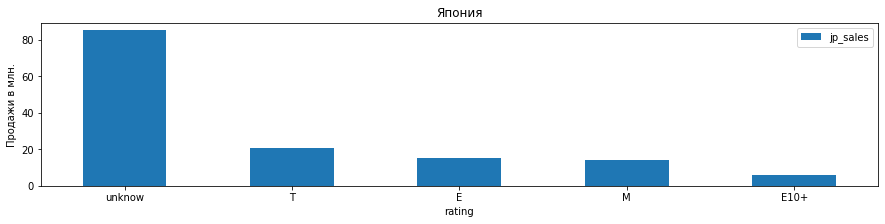

In [61]:
# графики сводным таблицам  возросного рейтинга  за 2013-2016 год , для разных регионов
df_na_rating = df_actual.pivot_table(index='rating',values =['na_sales'], aggfunc = 'sum' ) \
    .sort_values('na_sales',ascending = False) 
df_na_rating.plot(kind ='bar', figsize = (15,3),rot = 0, title = 'Северная Америка', ylabel = 'Продажи в млн.')

df_eu_rating = df_actual.pivot_table(index='rating',values =['eu_sales'], aggfunc = 'sum' ) \
    .sort_values('eu_sales',ascending = False) 
df_eu_rating.plot(kind ='bar', figsize = (15,3),rot =0,title = 'Европа', ylabel = 'Продажи в млн.')

df_jp_rating = df_actual.query('~rating.isna()').pivot_table(index='rating',values =['jp_sales'], aggfunc = 'sum' ) \
    .sort_values('jp_sales',ascending = False) 
df_jp_rating.plot(kind ='bar', figsize = (15,3),rot =0,title = 'Япония', ylabel = 'Продажи в млн.')


<AxesSubplot:title={'center':'Япония'}, ylabel='jp_sales'>

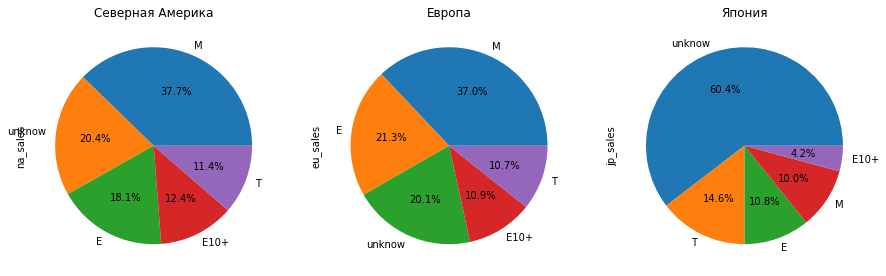

In [62]:
ax_1 = plt.subplot(2, 3, 1)
ax_2 = plt.subplot(2, 3, 2)
ax_3 = plt.subplot(2, 3, 3)

df_na_rating.plot.pie(y = 'na_sales',autopct='%1.1f%%',figsize = (15,15), legend=False,
             title= 'Северная Америка',ax= ax_1)

df_eu_rating.plot.pie(y = 'eu_sales',autopct='%1.1f%%',figsize = (15,15), legend=False,
             title= 'Европа', ax = ax_2 )

df_jp_rating.plot.pie(y = 'jp_sales',autopct='%1.1f%%',figsize = (15,15),legend=False,
             title= 'Япония', ax = ax_3 )

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Мы при предобработке данных не поставили заглушку на пропуски в рейтинге ESRB. И игры без рейтинга оказываются полностью исключенными из анализа. Но продажи именно этих игр могут указать на ключевое различие в регионах.</font><br>
<font color='DarkMagenta'>👉 А проблема у нас в том, что если посмотреть в инете, что из себя представляет рейтинг ESRB, то окажется, что он предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется. Наша задача смотреть шире на исходный датасет, так как за цифрами находятся реальные бизнес-процессы. И мы должны это учитывать при предобработке данных.  Для этого лучше поставить заглушку и вывести ее при анализе.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Blue'>Вместо пропусков добавлена категория "unknow" </font><br>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Это пример, когда пропуски в датасете имеют значение. В Японии свой рейтинг и им мало интересны игры с Северо-Американским рейтингом. А есть еще рейтинги ЕС, отдельно в Германии, в Австралии и т.д. Но у нас нет по ним данных и в данном случае пропуск является признаком, что игра имеет другой рейтинг и выпускалась не в Северной Америке.</font>

In [63]:
# Комментарий ревьюера
temp = df_actual.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


unknow    977
M         369
T         333
E         302
E10+      252
Name: rating, dtype: int64

Видим высокую популярность игр выпускаемых не американскими компаниями, так как им не присвоен рейтинг ESRB 

Взрослые японцы меньше играю в компьютерные игры чем европейцы и американцы.

## Проверка гипотез

Проверка гипотизы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
```
H_0: Пользовательские рейтинги (user_score) платформы Xbox = пользовательским рейтингам (user_score) платформы PC`
H_a: Пользовательские рейтинги (user_score) платформы Xbox ≠ пользовательским рейтингам (user_score) платформы PC`
alpha = 0.05
```

In [64]:
from scipy import stats as st

In [65]:
results = st.ttest_ind(df_actual[df_actual['platform'] =='XOne']['user_score'].dropna(),
                       df_actual[df_actual['platform'] =='PC']['user_score'].dropna(), equal_var = 0)
alpha = 0.05

print('Средний пользовательский рейтинг XOne =',df_actual[df_actual['platform'] =='XOne']['user_score'].mean()/10)
print('Средний пользовательский рейтинг PC =',df_actual[df_actual['platform'] =='PC']['user_score'].mean()/10,'\n')

# вывод значения p-value на экран 
print('Уровень значимости pvalue =',results.pvalue)
# условный оператор с выводом строки с ответом
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средний пользовательский рейтинг XOne = 6.5214285714285705
Средний пользовательский рейтинг PC = 6.269677419354839 

Уровень значимости pvalue = 0.1475959401343053
Не получилось отвергнуть нулевую гипотезу


Проверка гипотизы: Средние пользовательские рейтинги жанров Action  и Sports  разные;
```
H_0: Пользовательские рейтинги жанров Action = пользовательским рейтингам жанра Sports`
H_a: Пользовательские рейтинги жанров Action ≠ пользовательским рейтингам жанра Sports`
alpha = 0.05
```

In [66]:
results = st.ttest_ind(df_actual[df_actual['genre'] =='Action']['user_score'].dropna(),
                       df_actual[df_actual['genre'] =='Sports']['user_score'].dropna(), equal_var = 0)
alpha = 0.05

print('Средний пользовательский рейтинг Action =',df_actual[df_actual['genre'] =='Action']['user_score'].mean()/10)
print('Средний пользовательский рейтинг Sports =',df_actual[df_actual['genre'] =='Sports']['user_score'].mean()/10,'\n')

# вывод значения p-value на экран 
print('уровень значимости pvalue = ',results.pvalue)
# условный оператор с выводом строки с ответом
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средний пользовательский рейтинг Action = 6.837532133676092
Средний пользовательский рейтинг Sports = 5.238125 

уровень значимости pvalue =  1.446003970070494e-20
Отвергаем нулевую гипотезу


За нулевую гипотезу принята гипотеза о равенстве средних значений совокупностей.То есть если мы живем в мире где действительно 
существует равенство средних оценок пользователей  XOne и PC, то  при получении pvalue > alpha у нас нет оснований отвергнуть нулевую гипотезу и принять альтернативную (двухстороннюю, противоположную где средние оценки больше или меньше).

Во втором случае за нулевую гипотезу также принята гипотеза о равенстве средних значений совокупностей.То есть если мы живем в мире где действительно существует равенство средних оценок жанра  Action и Sports, то  при получении pvalue < alpha ('такой результат получить маловероятно, мы попали в хвосты нормального распределения), у нас у нас есть  основания отвергнуть нулевую гипотезу и принять альтернативную (двухстороннюю, противоположную где средние оценки больше или меньше).

Критерий Стьюдента выбран из-за того что генеральные совокупности не зависят друг от друга

**Основные выводы**:
   * Игровые платформы имеют растущий тренд продаж игр, с момента выхода на рынок - от 1 до 6 лет.
   * PS2 и DS являются самыми популярными игровыми платформами c 1980-2013. 
   * PS4 и XOne являются самыми популярными игровыми платформами на 2015-2016 с долей продаж на них игр около 70 %  и растущим трендом 
   * Отсутствует корреляция  между уровнем продаж и оценками пользователей, но при этом есть положительная корреляция между оценками критиков и продажами
   * Shooter и Action является самым популярным жанром по количеству продаж 
   * Пользователь Северной Америки играет на PS4 и XOne, предпочитает такие жанры как Shooter, Action, Sports. И  возрастной категории M.
   * Пользователь из Европы имеет похожую характеристику с пользователем из Северной Америки, но с большим предпочтением к PS4.
   * Пользователь из Японии отличается от американца и европейца. Вообще не играет на XOne, а предпочитает японские платформы  3DO, PS4, предпочитает такие жанры как Action, Role-plaing, не очень любит спортивные симуляторы. И так как он играет в игры не американских компаний имеет неизвестный возрастной рейтинг.
   * не одну из проверяемых гипотез не удалось опровергнуть (Средние пользовательские рейтинги жанров Action  и Sports  разные, Средние пользовательские рейтинги платформ Xbox One и PC одинаковые) 
   
Рекомендуется вкладывать рекламный бюджет на 2017 год в игру которая должна:
   * быть доступна на PS4 и XOne;
   * включать жанр Shooter;
   * иметь хорошую оценку от критиков;
   * ориентирована на рынок Америки и Европы
   * иметь возастной рейтинг М.
 
 Алгоритм определения хорошей игры по историческим данным:
   * установить по данным актуальные игровые платформы 
   * взять временной интервал максимально близко предшествующий прогнозному году (но при этом достаточный по размеру)
   * установить популярнейшие  жанры по объемам продаж на этих платформах
   * в большей степени орентироваться на оценку критиков, чем на пользовательскую